<h6 style="text-align:right;">Réalisé par: <span>Mohammed EHIRI</span></h6>


<h3 align="center" style="font-size: 3em;"><strong>Utilisation de l'apprentisage automatique et profond pour l'analyse et la prediction des comportements des noeuds dans un réseau Blockchain</strong></h3>

# 
# 

# 
<h2><strong>Importation des bibliotheques necessaires</strong></h2>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


<h2><strong>Chargement des donnée</strong></h2>

- Nous utilisons la librairie **pandas** de Python pour présenter les données en format **DataFrame**.

In [2]:
df = pd.read_csv('/kaggle/input/ethereum-frauddetection-dataset/transaction_dataset.csv', index_col=0)

In [3]:
df = df.iloc[:,2:]


<h2><strong>Phase d'Analyse des données</strong></h2>

- La méthode `head()` permet d'afficher 5 premières lignes du dataframe. 

In [4]:
df.head()


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


# 
- Affichage des informations concernant le type des colonnes par la methode  `df.info()`

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841 non-

# 
- La méthode **`describe`** affiche des statistiques descriptives des données numériques.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FLAG,9841.0,2.214206e-01,4.152241e-01,0.00,0.000000,0.000000e+00,0.000000,1.000000e+00
Avg min between sent tnx,9841.0,5.086879e+03,2.148655e+04,0.00,0.000000,1.734000e+01,565.470000,4.302877e+05
Avg min between received tnx,9841.0,8.004851e+03,2.308171e+04,0.00,0.000000,5.097700e+02,5480.390000,4.821755e+05
Time Diff between first and last (Mins),9841.0,2.183333e+05,3.229379e+05,0.00,316.930000,4.663703e+04,304070.980000,1.954861e+06
Sent tnx,9841.0,1.159317e+02,7.572264e+02,0.00,1.000000,3.000000e+00,11.000000,1.000000e+04
Received Tnx,9841.0,1.637009e+02,9.408366e+02,0.00,1.000000,4.000000e+00,27.000000,1.000000e+04
Number of Created Contracts,9841.0,3.729702e+00,1.414456e+02,0.00,0.000000,0.000000e+00,0.000000,9.995000e+03
Unique Received From Addresses,9841.0,3.036094e+01,2.986211e+02,0.00,1.000000,2.000000e+00,5.000000,9.999000e+03
Unique Sent To Addresses,9841.0,2.584016e+01,2.638204e+02,0.00,1.000000,2.000000e+00,3.000000,9.287000e+03
min value received,9841.0,4.384515e+01,3.259291e+02,0.00,0.001000,9.585600e-02,2.000000,1.000000e+04


- **`df.isna().sum()`** est une méthode de pandas qui renvoie un objet Series contenant le nombre de valeurs manquantes (NaN) pour chaque colonne d'un DataFrame df.

In [7]:
print(df.isna().sum())
print("Total des valeurs monquantes:",df.isna().sum().sum())

FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contract                                 0
max val sent to contract

<h2><strong>Preparation des données</strong></h2>

In [8]:
df.isnull().sum()


FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contract                                 0
max val sent to contract

In [9]:
df.drop(['min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total ether sent contracts', ' ERC20 uniq sent addr.1', ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract'], axis=1, inplace=True)

In [10]:


#df = pd.get_dummies(df, columns=[' ERC20 most sent token type', ' ERC20_most_rec_token_type'])


In [11]:
import plotly
import plotly.express as px

duplicateRowsDF = df[df.duplicated()]
print("Duplicated Entries")
display(duplicateRowsDF)

df = df[~df.duplicated()]


missing_data = df.isnull().sum().sort_values(ascending=False)

missing_data = missing_data.reset_index(drop=False)
missing_data = missing_data.rename(columns={"index": "Columns", 0: "Value"})
missing_data['Proportion'] = (missing_data['Value']/len(df))*100

sample = missing_data[missing_data['Proportion']>1]
fig = px.pie(sample, names='Columns', values='Proportion',
             color_discrete_sequence=px.colors.sequential.Viridis_r,
             title='Columns with a percentage of Missing values over 1%')
fig.update_traces(textposition='inside', textinfo='label')
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()

Duplicated Entries


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2933,0,5980.35,18633.46,498256.47,21,20,0,2,18,1.990000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0
2934,0,7042.64,2694.86,80594.87,8,9,0,8,7,0.001000,...,0.299173,140.102687,70.200930,140.102687,140.102687,140.102687,1.0,2.0,Golem,OmiseGO
2936,0,0.00,0.00,0.00,0,1,0,1,0,0.250303,...,0.000000,64.921895,14.443795,0.000000,0.000000,0.000000,0.0,5.0,NaN,Livepeer Token
2937,0,0.00,0.00,0.00,0,1,0,1,0,0.804725,...,0.000000,171.588208,38.011146,0.000000,0.000000,0.000000,0.0,5.0,NaN,Livepeer Token
2939,0,9695.78,1133.48,257022.97,14,107,0,6,1,1.027784,...,600.000000,600.000000,600.000000,0.000000,0.000000,0.000000,0.0,1.0,NaN,AICRYPTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,1.337000,1.337000,1.337000,0.000000,0.000000,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9818,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,13.370000,13.370000,13.370000,0.000000,0.000000,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9823,1,0.00,0.00,0.00,0,0,1,0,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df.fillna(method='ffill')
fig = px.pie(df, names='FLAG',
             color_discrete_sequence=px.colors.sequential.Viridis_r,
             title='Proportion of data for FLAG column')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics)

- **`sns.heatmap()`** est une fonction de la bibliothèque Python Seaborn qui permet de créer des cartes de chaleur pour visualiser les données tabulaires sous forme de matrices. Cette fonction peut être utilisée pour explorer les relations entre deux variables, en affichant une couleur différente pour chaque valeur de la variable sur la carte de chaleur.

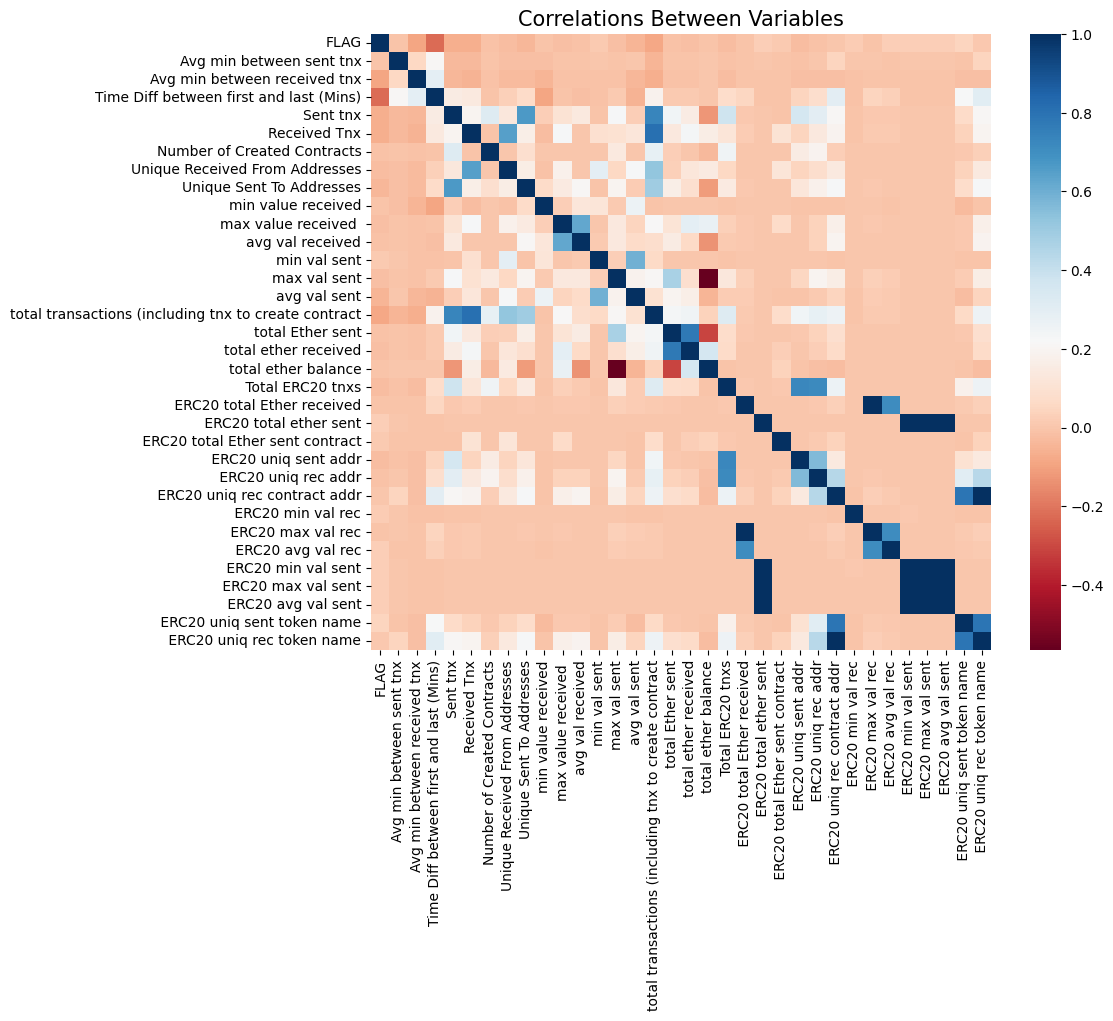

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

#### Decoupage du jeu de données en `X` et `y`:
- X : les variables explicatives (Explained variables)
- y : la variable à expliquer ou la variable cible (Target variable)

In [15]:
X = df.drop("FLAG", axis=1)
y = df["FLAG"]

<h2><strong>Standardisation des données</strong></h2>

- La normalisation des données en apprentissage automatique (ML) est une étape importante dans le prétraitement des données avant de les utiliser pour entraîner un modèle de ML. La standardisation des données vise à mettre toutes les variables d'entrée à la même échelle afin que les modèles de ML puissent fonctionner plus efficacement.

- La normalisation des données implique de transformer les données d'entrée de manière à avoir une moyenne nulle et une variance unitaire. Cela peut être fait en soustrayant la moyenne de chaque variable d'entrée et en divisant par l'écart type. Cette opération est généralement effectuée sur chaque colonne de la matrice de données.


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


<h2><strong>Division de données en une partie d'apprentissage et une autre de test</strong></h2>


- La fonction **`train_test_split`** est une fonctionnalité courante dans le prétraitement des données pour les modèles de machine learning. Elle est utilisée pour séparer les données en un ensemble **d'apprentissage** et un ensemble de **test**, afin de pouvoir évaluer la performance du modèle sur des données qui n'ont pas été utilisées pour l'entraînement.

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , shuffle=True)

- on doit prendre au minimum 30% de données pour le test et la validation

- Definition d'une fonction pour l'evaluation des modeles 

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

def binary_classification_evaluation(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)

    cm = confusion_matrix(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    precision, recall, _ = precision_recall_curve(y_true, y_prob)

    print("-+-" * 30)
    print("Évaluation du modèle selon les métriques suivantes :")
    print("-+-" * 30)
    print(f"Précision               ===> {precision[0]:.2f}")
    print(f"Rappel                  ===> {recall[0]:.2f}")
    print(f"F1-score                ===> {f1:.2f}")
    print(f"la courbe ROC (ROC AUC) ===> {roc_auc:.2f}")
    print(f"Exactitude (Accuracy)   ===> {accuracy:.2f}")
    print("-+-" * 30)

    return precision[0], recall[0], f1, roc_auc, accuracy


In [19]:
def Coeff_intercept_model(model):
    coefs = model.coef_
    intercept = model.intercept_

    result = f"""
    {'-+-' * 30}
    Coefficients :
    {'-+-' * 30}

    {coefs}
    {'-+-' * 30}
    Biais : {intercept}
    {'-+-' * 30}
    """

    print(result)


- Cette fonction prend en entrée un modèle de classification bibaire entraîné avec scikit-learn et utilise les attributs `coef_` et `intercept_` pour afficher les coefficients et le biais respectivement.


In [20]:
results_df = pd.DataFrame(columns=['Modèle', 'Précision', 'Rappel', 'F1-score', 'ROC AUC', 'Exactitude'])

- La ligne de code crée un objet pandas DataFrame vide appelé "models" qui aura quatre colonnes: 'Modèle', 'Précision', 'Rappel', 'F1-score', 'ROC AUC'et 'Exactitude' . Cette ligne sert à stocker les résultats de l'évaluation des différents modèles de classification que nous allons entraîner, afin de pouvoir les comparer facilement et choisir le meilleur modèle en fonction des métriques d'évaluation. Chaque ligne de ce DataFrame correspondra à un modèle, et chaque colonne contiendra une métrique d'évaluation différente pour ce modèle.
# 

# **K-plus proches voisins**
- L'algorithme **`KNeighborsClassifier`** fonctionne en trouvant les k points de données les plus proches du point de données que l'on souhaite prédire. Ensuite, il calcule la moyenne (ou la médiane) de la variable cible des k points les plus proches et utilise cette valeur pour prédire la variable cible du point de données en question.

- La distance entre les points de données est généralement mesurée à l'aide de la distance euclidienne, bien qu'il existe d'autres mesures de distance possibles. Le paramètre **k**, qui représente le nombre de voisins à prendre en compte pour chaque prédiction, doit être défini par l'utilisateur.

- `KNeighborsClassifier` est un algorithme simple et efficace pour la classification de données. Il peut être utile pour les ensembles de données de petite à moyenne taille et pour les problèmes de classification. Cependant, il peut être moins efficace pour les grands ensembles de données en raison de la complexité de calcul de la distance entre chaque point de données.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

param_grid = {"n_neighbors": np.arange(1, 41)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)

n_neighbors = grid_search.best_params_["n_neighbors"]

print("Meilleure valeur de n_neighbors : ", n_neighbors)

knn_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_["n_neighbors"])
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)
y_prob = knn_best.predict_proba(X_test)[:, 1]

precision, recall, f1, roc_auc, accuracy = binary_classification_evaluation(y_test, y_pred, y_prob)

model_name = "KNeighborsClassifier"
temp_df = pd.DataFrame({'Modèle': [model_name], 'Précision': [precision], 'Rappel': [recall], 'F1-score': [f1], 'ROC AUC': [roc_auc], 'Exactitude': [accuracy]})
results_df = pd.concat([results_df, temp_df], ignore_index=True)

Meilleure valeur de n_neighbors :  8
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Évaluation du modèle selon les métriques suivantes :
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Précision               ===> 0.18
Rappel                  ===> 1.00
F1-score                ===> 0.83
la courbe ROC (ROC AUC) ===> 0.96
Exactitude (Accuracy)   ===> 0.94
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-



# **LogisticRegression**

`LogisticRegression` est un algorithme d'analyse statistique utilisé pour la classification. Il s'agit d'un modèle de régression qui modélise la probabilité d'un événement en ayant les logarithmes des cotes pour l'événement être une combinaison linéaire d'une ou plusieurs variables indépendantes. Le "logistic" dans le nom de ce modèle fait référence à la fonction logistique, qui est utilisée pour effectuer la tâche de classification dans l'algorithme. LogisticRegression est un algorithme simple mais très efficace pour la classification binaire. Il est couramment utilisé pour prédire des résultats binaires tels que oui ou non, vrai ou faux, etc. LogisticRegression est disponible dans la bibliothèque scikit-learn en Python. Pour utiliser LogisticRegression, nous devons d'abord importer la classe depuis le module `sklearn.linear_model`. Nous pouvons ensuite créer une instance de la classe LogisticRegression et adapter le modèle à nos données d'entraînement en utilisant la méthode fit. Nous pouvons ensuite faire des prédictions sur de nouvelles données en utilisant la méthode predict. Il existe plusieurs ressources en ligne qui fournissent plus d'informations sur LogisticRegression et comment l'utiliser.

In [22]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred_log_reg = logistic_regression.predict(X_test)
y_prob_log_reg = logistic_regression.predict_proba(X_test)[:, 1]


precision, recall, f1, roc_auc, accuracy = binary_classification_evaluation(y_test, y_pred_log_reg, y_prob_log_reg)

model_name = "LogisticRegression"
temp_df = pd.DataFrame({'Modèle': [model_name], 'Précision': [precision], 'Rappel': [recall], 'F1-score': [f1], 'ROC AUC': [roc_auc], 'Exactitude': [accuracy]})
results_df = pd.concat([results_df, temp_df], ignore_index=True)

-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Évaluation du modèle selon les métriques suivantes :
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Précision               ===> 0.18
Rappel                  ===> 1.00
F1-score                ===> 0.06
la courbe ROC (ROC AUC) ===> 0.83
Exactitude (Accuracy)   ===> 0.82
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


In [23]:
Coeff_intercept_model(logistic_regression)


    -+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
    Coefficients :
    -+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-

    [[ 0.23707935  0.08655777 -1.82657588 -2.80290673  0.15766546  0.03092171
   0.36168639 -0.17767769 -0.02674044 -0.39344143 -0.36930302  0.43983054
  -0.38359632 -0.81628678 -1.45732814  0.0882858  -0.26992351 -0.53599452
  -1.53755654 -0.18492443 -0.18636236 -0.1786864  -2.418291    1.29080357
   0.06402969  0.00588489 -0.1491956   1.00062195  0.1057223   0.11742322
   0.0510054  -0.38449053  1.36828586]]
    -+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
    Biais : [-2.8034392]
    -+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
    


- Dans cet exemple, `logistic_regression` est le modèle de régression logistique entraîné sur les données d'entraînement, X_train et y_train. Les prédictions sont effectuées sur les données de test, X_test, et comparées aux vraies valeurs correspondantes, y_test. Le graphique résultant montre la relation entre les vraies valeurs et les prédictions, ce qui peut donner une idée de la qualité du modèle.

- nous pouvons en deduire qu'il y a une correlation entre les prédictions et les vraies valeurs , ce qui signifie que le modele `logistic_regression`  de régression logistique donne de bons resultats.

# 
# **SVC (Support Vector Classifier)**

SVC est un algorithme d'apprentissage supervisé utilisé pour la classification. SVC signifie `C-support vector classification` et est une implémentation de la méthode des machines à vecteurs de support (SVM). Les SVM sont des algorithmes d'apprentissage supervisé qui peuvent être utilisés pour la classification ou la régression. Les SVM sont connus pour leur capacité à gérer des données de haute dimensionnalité et des relations non linéaires. Les SVM peuvent être utilisés pour une variété de tâches, telles que la classification de texte, la classification d'image, la détection de spam, l'identification d'écriture manuscrite, l'analyse d'expression génique, la détection de visage et la détection d'anomalies. La classe SVC est disponible dans la bibliothèque scikit-learn en Python. Pour utiliser SVC, nous devons d'abord importer la classe depuis le module sklearn.svm. Nous pouvons ensuite créer une instance de la classe SVC et adapter le modèle à nos données d'entraînement en utilisant la méthode fit. Nous pouvons ensuite faire des prédictions sur de nouvelles données en utilisant la méthode predict.

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
}

svm = SVC()

grid_search_svc = GridSearchCV(svm, param_grid_svc, scoring='accuracy', cv=5)
grid_search_svc.fit(X_train, y_train)

best_hyperparameters_svc = grid_search_svc.best_params_
print("Les meilleurs hyperparamètres sont :", best_hyperparameters_svc)

Les meilleurs hyperparamètres sont : {'C': 10, 'kernel': 'rbf'}


In [25]:
best_params = grid_search_svc.best_params_
svm_best = SVC(**best_params)
svm_best.fit(X_train, y_train)
y_pred_svc = svm_best.predict(X_test)
y_prob_svc = svm_best.decision_function(X_test)

precision, recall, f1, roc_auc, accuracy = binary_classification_evaluation(y_test, y_pred_svc, y_prob_svc)

model_name = "SVC"
temp_df = pd.DataFrame({'Modèle': [model_name], 'Précision': [precision], 'Rappel': [recall], 'F1-score': [f1], 'ROC AUC': [roc_auc], 'Exactitude': [accuracy]})
results_df = pd.concat([results_df, temp_df], ignore_index=True)



-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Évaluation du modèle selon les métriques suivantes :
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Précision               ===> 0.18
Rappel                  ===> 1.00
F1-score                ===> 0.31
la courbe ROC (ROC AUC) ===> 0.93
Exactitude (Accuracy)   ===> 0.84
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


**Remarque**
*La valeur du paramètre de régularisation C pour SVM dépend de la complexité de  l'ensemble de données et de la tolérance à l'erreur de prédiction. En général, une valeur plus grande de C donnera un modèle avec une marge d'erreur plus petite, ce qui peut conduire à un surapprentissage si la valeur de C est trop grande.*

### **Recapitulation**


- *`Dans cet exemple, nous avons défini les hyperparamètres à tester à l'aide d'un dictionnaire param_dist. Nous avons  créé un objet de modèle SVC et utilisé la méthode RandomizedSearchCV pour rechercher aléatoirement les meilleures valeurs d'hyperparamètres. Nous avons ajusté le modèle sur les données d'entraînement et utilisé les meilleurs hyperparamètres pour prédire les valeurs sur les données de test.`*


# **DecisionTreeClassifier**

- `DecisionTreeClassifier` est une classe de la bibliothèque Python scikit-learn qui permet de construire des modèles de classification à partir d'arbres de décision. Un arbre de décision est une méthode d'apprentissage supervisé qui utilise une série de règles de décision pour prédire les valeurs de la cible.

- Le principe de base de l'arbre de décision est de diviser récursivement les données en sous-ensembles plus petits en fonction des valeurs des variables prédictives, jusqu'à ce que chaque sous-ensemble soit suffisamment homogène en termes de valeurs de la cible ou jusqu'à ce qu'une limite de profondeur maximale soit atteinte. Chaque division est choisie de manière à minimiser la variance des valeurs de la cible dans chaque sous-ensemble. L'arbre résultant peut être considéré comme un ensemble de règles de décision simples qui peuvent être facilement interprétées.

- L'algorithme de construction de l'arbre de décision pour la classification utilise la mesure de la variance de la cible dans chaque sous-ensemble pour évaluer la qualité de la division. La variance est une mesure de la dispersion des valeurs de la cible dans chaque sous-ensemble, et plus elle est faible, plus les valeurs de la cible sont homogènes. L'algorithme cherche donc à diviser les données de manière à minimiser la variance dans chaque sous-ensemble.

- La fonction de coût pour la construction de l'arbre de décision est la variance réduite (reduced variance), qui est définie comme la différence entre la variance totale des valeurs de la cible et la somme pondérée des variances des valeurs de la cible dans chaque sous-ensemble. Plus cette valeur est élevée, meilleure est la division.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

arbre_decision = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(arbre_decision, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

best_hyperparameters = grid_search.best_params_
print("Les meilleurs hyperparamètres sont :", best_hyperparameters)


Les meilleurs hyperparamètres sont : {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [27]:
arbre_decision_best = DecisionTreeClassifier(**best_hyperparameters)
arbre_decision_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [28]:
y_pred_DT = arbre_decision_best.predict(X_test)
y_prob_DT = arbre_decision_best.predict_proba(X_test)[:, 1]
precision, recall, f1, roc_auc, accuracy = binary_classification_evaluation(y_test, y_pred_DT, y_prob_DT)
model_name = "DecisionTreeClassifier"
temp_df = pd.DataFrame({'Modèle': [model_name], 'Précision': [precision], 'Rappel': [recall], 'F1-score': [f1], 'ROC AUC': [roc_auc], 'Exactitude': [accuracy]})
results_df = pd.concat([results_df, temp_df], ignore_index=True)

-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Évaluation du modèle selon les métriques suivantes :
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Précision               ===> 0.18
Rappel                  ===> 1.00
F1-score                ===> 0.90
la courbe ROC (ROC AUC) ===> 0.96
Exactitude (Accuracy)   ===> 0.97
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


- *`Nous avons créé une instance de la classe DecisionTreeClassifier. Nous avons entraîné le modèle sur les données à l'aide de la méthode fit(), puis nous avons utilisé le modèle pour faire des prédictions sur une grille de points de test X_test.`*

`plot_tree` est une fonction de la bibliothèque Python scikit-learn qui permet de visualiser l'arbre de décision construit par un modèle de régression ou de classification. Cette fonction est très utile pour comprendre comment l'arbre de décision prend des décisions et pour interpréter les résultats d'un modèle.

In [29]:
from sklearn.tree import export_text, plot_tree

X_train = pd.DataFrame(X_train, columns=df.drop(columns=['FLAG']).columns)
tree_rules = export_text(arbre_decision_best, feature_names=list(X_train.columns))
print(tree_rules)


|---  ERC20 min val rec <= -0.03
|   |---  Total ERC20 tnxs <= -0.08
|   |   |--- class: 0
|   |---  Total ERC20 tnxs >  -0.08
|   |   |--- Time Diff between first and last (Mins) <= -0.47
|   |   |   |--- total transactions (including tnx to create contract <= 4.54
|   |   |   |   |--- Unique Received From Addresses <= -0.09
|   |   |   |   |   |--- Time Diff between first and last (Mins) <= -0.62
|   |   |   |   |   |   |--- total ether balance <= -0.01
|   |   |   |   |   |   |   |--- Avg min between sent tnx <= -0.24
|   |   |   |   |   |   |   |   |--- Time Diff between first and last (Mins) <= -0.70
|   |   |   |   |   |   |   |   |   |--- Unique Received From Addresses <= -0.10
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Unique Received From Addresses >  -0.10
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Time Diff between first and last (Mins) >  -0.70
|   |   |   |   |   |   |   |  

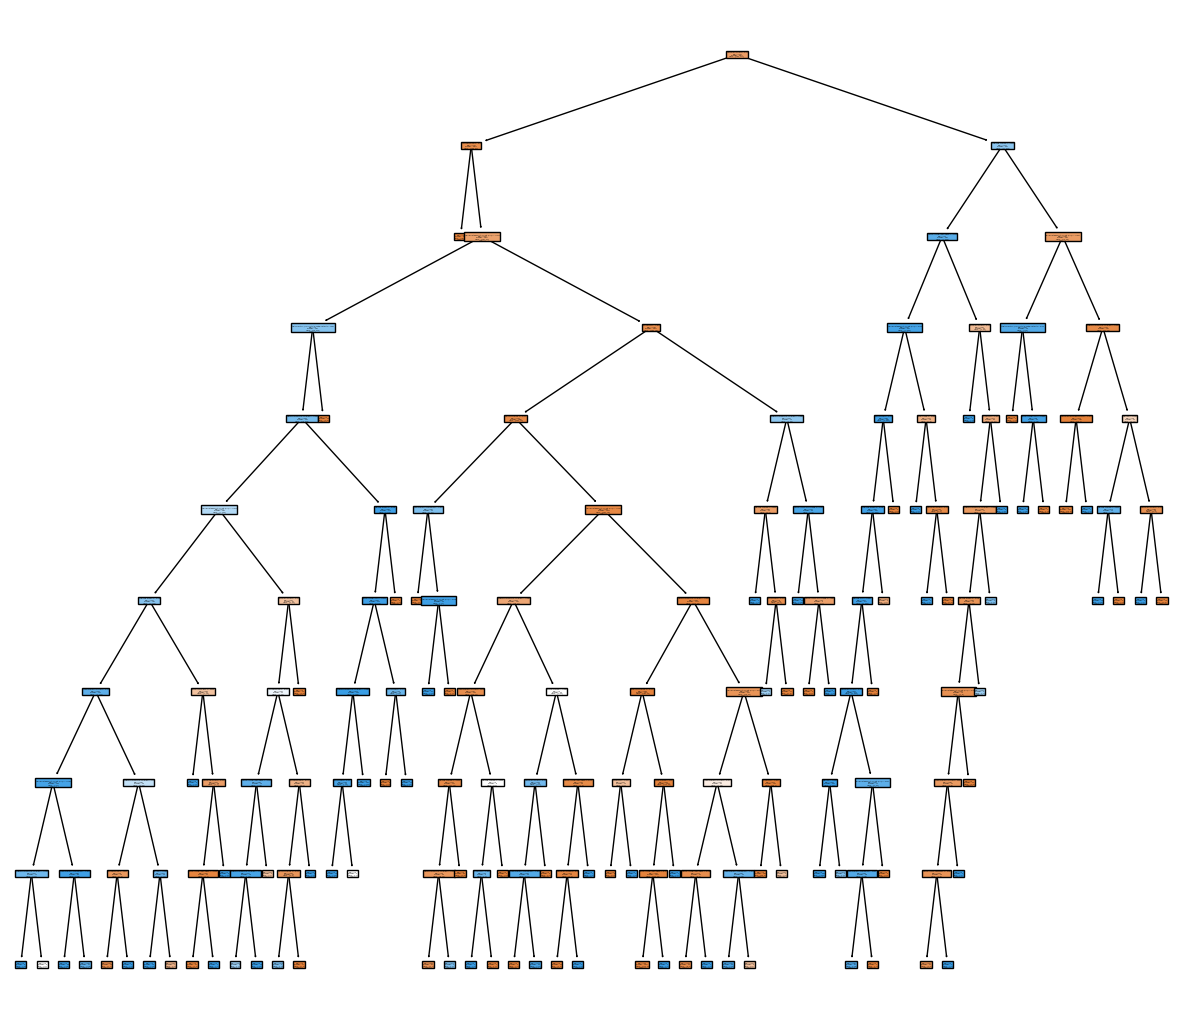

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 13))
plot_tree(arbre_decision_best, filled=True, feature_names=list(X_train.columns), class_names=["0", "1"])
plt.show()


# 
# **RandomForestClassifier**

- `RandomForestClassifier` est un modèle d'apprentissage supervisé de la bibliothèque Python **`scikit-learn`**, qui utilise un ensemble d'**`arbres de décision`** pour effectuer une classification sur des données d'entrée. Le modèle est basé sur la technique d'ensemble learning appelée forêt aléatoire (random forest), qui consiste à entraîner plusieurs arbres de décision sur des sous-ensembles différents des données d'entraînement, puis à combiner les prédictions des arbres pour obtenir une prédiction finale plus robuste.

- Le modèle RandomForestClassifier est très utile pour les problèmes de régression non linéaires, car il peut modéliser des relations complexes entre les variables prédictives et la variable cible. Il est également résistant au **surapprentissage (overfitting)** grâce à la technique de bagging (bootstrap aggregating) qui est utilisée pour entraîner les arbres de décision.

**une recherche aléatoire (randomized search) des meilleurs hyperparamètres pour un modèle RandomForestClassifier**

**`RandomizedSearchCV`** est une fonction de la bibliothèque Python scikit-learn qui permet d'effectuer une recherche aléatoire (randomized search) des meilleurs hyperparamètres pour un modèle d'apprentissage supervisé en utilisant une validation croisée (cross-validation). La recherche aléatoire des hyperparamètres est utile lorsque l'espace des hyperparamètres est grand et qu'il est difficile ou coûteux de l'explorer entièrement avec une recherche exhaustive.

La fonction RandomizedSearchCV prend en entrée un modèle d'apprentissage supervisé, une grille d'hyperparamètres à explorer, un nombre de combinaisons aléatoires à tester, une métrique d'évaluation et une stratégie de validation croisée. Elle retourne le meilleur ensemble d'hyperparamètres trouvés et la performance associée.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['auto', 'sqrt']

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}

rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, 
                               n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

best_hyperparameters = rf_random.best_params_
print("Les meilleurs hyperparamètres sont :", best_hyperparameters)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

KeyboardInterrupt: 

In [ ]:
random_forest_best = RandomForestClassifier(**best_hyperparameters)
random_forest_best.fit(X_train, y_train)
y_pred_RF = random_forest_best.predict(X_test)
y_prob_RF = random_forest_best.predict_proba(X_test)[:, 1]

precision, recall, f1, roc_auc, accuracy = binary_classification_evaluation(y_test, y_pred_RF, y_prob_RF)

model_name = "RandomForestClassifier"
temp_df = pd.DataFrame({'Modèle': [model_name], 'Précision': [precision], 'Rappel': [recall], 'F1-score': [f1], 'ROC AUC': [roc_auc], 'Exactitude': [accuracy]})
results_df = pd.concat([results_df, temp_df], ignore_index=True)

### **Recapitulation**

- *`Dans cet exemple, nous avons défini une grille d'hyperparamètres à explorer pour le modèle RandomForestClassifier, comprenant le nombre d'arbres (n_estimators), le nombre maximum de variables à considérer à chaque division (max_features), la profondeur maximale des arbres (max_depth), le nombre minimum d'échantillons requis pour une division (min_samples_split) et le nombre minimum d'échantillons requis pour une feuille (min_samples_leaf). Nous avons créé un objet RandomizedSearchCV en spécifiant le modèle, la grille d'hyperparamètres, la stratégie de validation croisée (cv),une graine aléatoire (random_state). Nous avons lancé la recherche aléatoire des hyperparamètres sur les données d'entraînement.`*
# 

In [ ]:
import xgboost as xgb
from sklearn.metrics import make_scorer, roc_auc_score

param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_model = xgb.XGBClassifier(objective='binary:logistic')
roc_auc_scorer = make_scorer(roc_auc_score)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=roc_auc_scorer, cv=10)
grid_search.fit(X_train, y_train)

best_hyperparameters = grid_search.best_params_
print("Les meilleurs hyperparamètres sont :", best_hyperparameters)


In [ ]:
xgb_model_best = xgb.XGBClassifier(**best_hyperparameters, objective='binary:logistic')
xgb_model_best.fit(X_train, y_train)
y_pred_xgb = xgb_model_best.predict(X_test)
y_prob_xgb = xgb_model_best.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

precision, recall, f1, roc_auc, accuracy = binary_classification_evaluation(y_test, y_pred_xgb, y_prob_xgb)

model_name = "XGBClassifier"
temp_df = pd.DataFrame({'Modèle': [model_name], 'Précision': [precision], 'Rappel': [recall], 'F1-score': [f1], 'ROC AUC': [roc_auc], 'Exactitude': [accuracy]})
results_df = pd.concat([results_df, temp_df], ignore_index=True)

# 
# **MLPClassifier**

- Le modèle de **`MLPClassifier`** est un réseau de neurones artificiels qui utilise une ou plusieurs couches cachées de neurones interconnectés pour apprendre une fonction non linéaire qui mappe un ensemble de variables d'entrée à une variable de sortie. Les couches cachées sont composées de neurones qui appliquent une fonction d'activation non linéaire à une combinaison linéaire des entrées pondérées.

In [ ]:
from sklearn.neural_network import MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(5, 10), (10, 10), (10, 20)],
    'activation': ['logistic', 'tanh', 'relu'],
    'max_iter': [100, 500, 1000]
}

mlp = MLPClassifier()

grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, scoring='accuracy', cv=5)
grid_search_mlp.fit(X_train, y_train)

best_hyperparameters_mlp = grid_search_mlp.best_params_
print("Les meilleurs hyperparamètres sont :", best_hyperparameters_mlp)

In [ ]:
best_mlp_model = MLPClassifier(**best_hyperparameters_mlp)
best_mlp_model.fit(X_train, y_train)
y_pred_mlp = best_mlp_model.predict(X_test)
y_prob_mlp = best_mlp_model.predict_proba(X_test)[:, 1]

precision, recall, f1, roc_auc, accuracy = binary_classification_evaluation(y_test, y_pred_mlp, y_prob_mlp)

model_name = "MLPClassifier"
temp_df = pd.DataFrame({'Modèle': [model_name], 'Précision': [precision], 'Rappel': [recall], 'F1-score': [f1], 'ROC AUC': [roc_auc], 'Exactitude': [accuracy]})
results_df = pd.concat([results_df, temp_df], ignore_index=True)

### Recapitulation
- *`Dans cet exemple,nous avons créé un objet MLPClassifier en spécifiant le nombre et la taille des couches cachées (hidden_layer_sizes), l'algorithme d'optimisation (solver), le nombre maximum d'itérations (max_iter) et une graine aléatoire (random_state). Nous avons entraîné le modèle sur les données d'entraînement à l'aide de la méthode fit, et prédit les valeurs de sortie pour les données de test à l'aide de la méthode predict. Enfin, nous avons calculé la performance du modèle en utilisant la fonction evaluation .`*

# 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train.shape[1]

model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

In [ ]:
y_pred_ANN = (model.predict(X_test) > 0.5).astype(int)


precision = precision_score(y_test, y_pred_ANN)
recall = recall_score(y_test, y_pred_ANN)
f1 = f1_score(y_test, y_pred_ANN)

model_name = "Neaural_Networks"
temp_df = pd.DataFrame({'Modèle': [model_name], 'Précision': [precision], 'Rappel': [recall], 'F1-score': [f1], 'ROC AUC': [roc_auc], 'Exactitude': [accuracy]})
results_df = pd.concat([results_df, temp_df], ignore_index=True)

cm = confusion_matrix(y_test, y_pred_ANN)

print("-+-" * 30)
print("Évaluation du modèle selon les métriques suivantes :")
print("-+-" * 30)
print(f"Précision               ===> {precision:.2f}")
print(f"Rappel                  ===> {recall:.2f}")
print(f"F1-score                ===> {f1:.2f}")
print(f"Exactitude (Accuracy)   ===> {accuracy:.2f}")
print("-+-" * 30)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Modèle', y='Rappel', palette='viridis')
plt.title('Comparaison des modèles par précision')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(results_df['Modèle'], results_df['Rappel'], marker='o')

ax.set_title('Comparaison des modèles par précision')
ax.set_xlabel('Modèle')
ax.set_ylabel('Exactitude')

ax.tick_params(axis='x', rotation=45)

plt.show();

**Vous pouvez visualiser les resultats des modeles pour plusieurs `metriques`, il suffit de fixer l'axe y par la metrique qui vous convient**